In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [2]:
train = pd.read_csv('dataset.csv',encoding='utf-8')
#only rows that are not null
train = train[train.Sentiment.isnull() == False]
train = train[train['SentimentText'].isnull() == False]
#convert string to int
train['Sentiment'] = train['Sentiment'].map(int)
train.head()

SentimentText  Sentiment
0  first think another Disney movie, might good, ...          1
1  Put aside Dr. House repeat missed, Desperate H...          0
2  big fan Stephen King's work, film made even gr...          1
3  watched horrid thing TV. Needless say one movi...          0
4  truly enjoyed film. acting terrific plot. Jeff...          1

In [3]:
#data preProcessing
#whitespace at the beggining
train['SentimentText'] = train['SentimentText'].str.lstrip()
#white space at the end
train['SentimentText'] = train['SentimentText'].str.rstrip()
#" at both sides
train['SentimentText'] = train['SentimentText'].str.strip()
#lowercase
train['SentimentText'] = train['SentimentText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#digits
#train['desc'] = train['desc'].str.replace('[0,1,2,3,4,5,6,7,8,9]','')
train['SentimentText'] = train['SentimentText'].str.replace('\d+', '')
#punctuations
train['SentimentText'] = train['SentimentText'].str.replace('[^\w\s]',' ')
#replace no space
train['SentimentText'] = train['SentimentText'].str.replace('[.;:!\'?,\"()\[\]]',' ')
#replace with space
train['SentimentText'] = train['SentimentText'].str.replace('(<br\s*/><br\s*/>)|(\-)|(\/)',' ')
#html tag
train['SentimentText'] = train['SentimentText'].str.replace('<[^>]+>',' ')
#wwww
train['SentimentText'] = train['SentimentText'].str.replace('www.[^ ]+',' ')
# Fill NaN with ' '
train['SentimentText'] = train['SentimentText'].fillna(' ')
#common words 100*
freq = pd.Series(' '.join(train['SentimentText']).split()).value_counts()[:100]
#print(freq)
freq = list(freq.index)
train['SentimentText'] = train['SentimentText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#rare words 100*
freq = pd.Series(' '.join(train['SentimentText']).split()).value_counts()[-100:]
freq = list(freq.index)
train['SentimentText'] = train['SentimentText'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#stopwords
stop = stopwords.words('english')
train['SentimentText'].apply(lambda x: [item for item in x if item not in stop])

0        [n, e,  , g, h,  , k,  , h, e, l, p,  , e, n, ...
1        [p, u,  , e,  , r,  , h, u, e,  , r, e, p, e, ...
2        [b, g,  , f, n,  , e, p, h, e, n,  , k, n, g, ...
3        [w, c, h, e,  , h, r, r,  , v,  , n, e, e, l, ...
4        [r, u, l,  , e, n, j, e,  , e, r, r, f, c,  , ...
5        [e, r,  , l,  , h, u, n,  , u, c, k,  , n, c, ...
6        [h, k, e, p, e, r, e,  , f, n,  , p, p, r, e, ...
7        [p, r, v, l, e, g, e,  , c, r, f, c, e,  , b, ...
8        [c, l, c,  , h, p, l,  , l, r,  , r, n, g,  , ...
9        [e, r, l,  , h, r,  , u, b, j, e, c,  , r, g, ...
10       [r, n, g, e,  , e, x,  , c, e,  , c, e,  , w, ...
11       [p, r, b, l, e,  , w, r,  , c, n, n, u,  , e, ...
12       [r, e,  , w, e,  , v,  , l, k, n, g,  , n,  , ...
13       [g,  , c, h, l, l,  , r, c,  , g, e, n, u,  , ...
14       [l, e, n,  , g, r, e, e, n,  , c,  , n, e,  , ...
15       [w, n, e, r, f, u, l,  , f, l,  , r,  , c, e, ...
16       [k,  ,  , p, e, v,  , w,  , r, g, c, e,  , e, .

In [4]:
train.head()

SentimentText  Sentiment
0  disney might kids help enjoy ages saw later da...          1
1  put aside dr house repeat missed desperate hou...          0
2  big fan stephen king greater fan king pet sema...          1
3  watched horrid tv needless worse frankly lower...          0
4  truly enjoyed terrific jeff combs talent recog...          1

In [5]:
#splitting the data into train set and validation set
SEED = 2000
# seed generates a random number between 0 to 2000
x_train, x_validation, y_train, y_validation = train_test_split(train.SentimentText, train.Sentiment, test_size=.2, random_state=SEED)
#print(x_train,y_train)

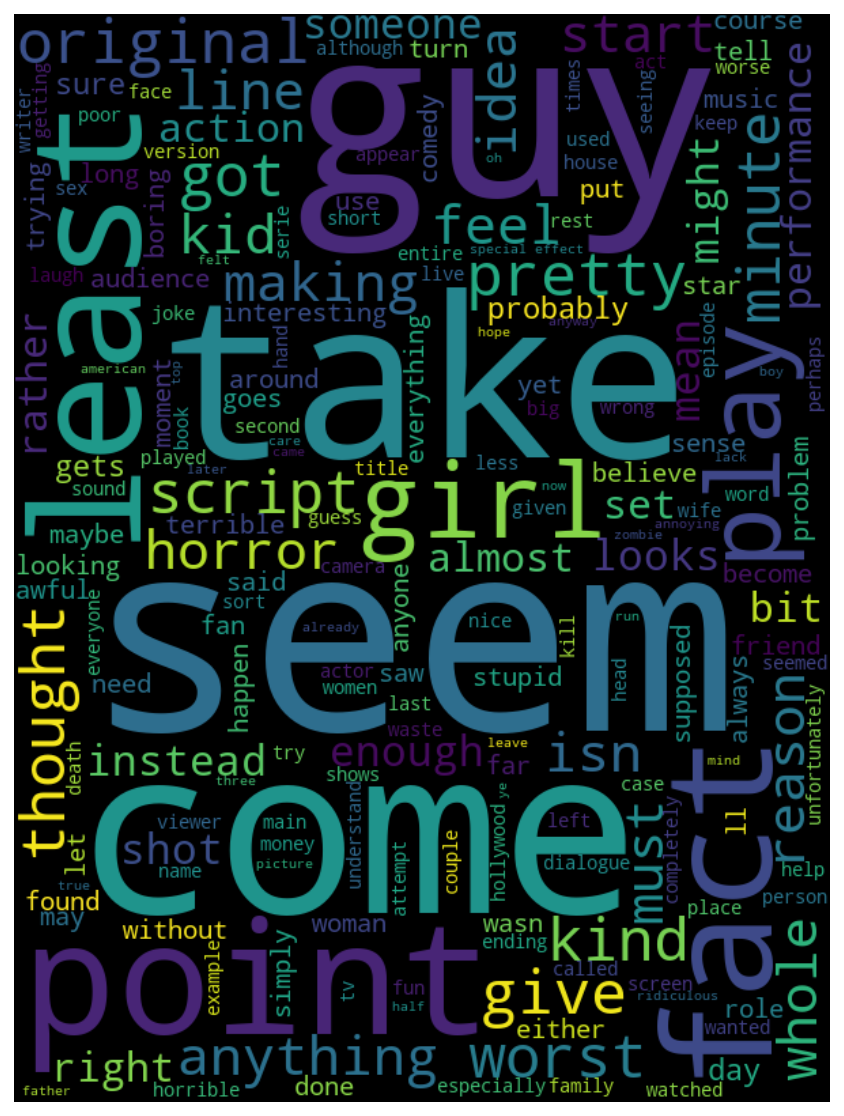

In [6]:
#  the size and colour of each word indicates its frequency or importance
#  using python library wordcloud
#  negative terms
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from wordcloud import WordCloud, STOPWORDS


neg_tweets = train[train.Sentiment == 0]
neg_string = []
for t in neg_tweets.SentimentText:
    neg_string.append(t)
#     concats devided sentences with spaces between them-->we have a big string of all of the sentences at the end 
neg_string = pd.Series(neg_string).str.cat(sep=' ')
# from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

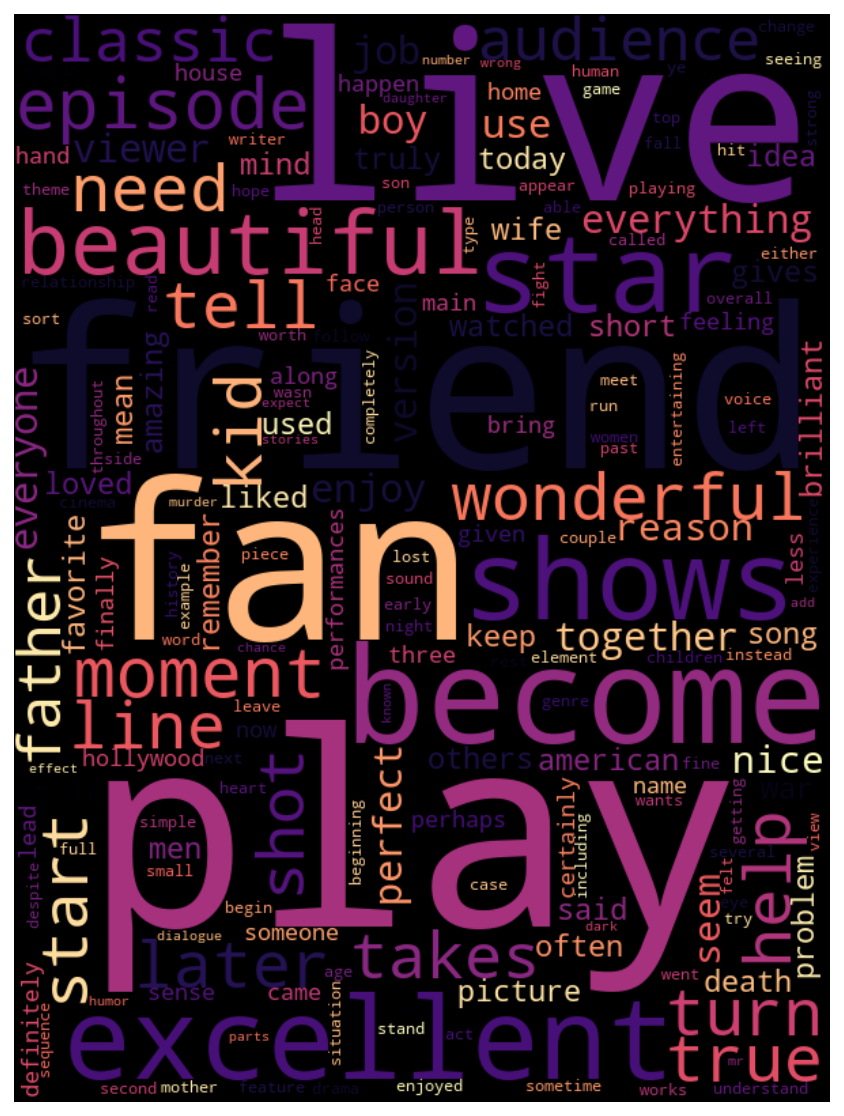

In [15]:
pos_tweets = train[train.Sentiment == 1]
pos_string = []
for t in pos_tweets.SentimentText:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [23]:
# reports validation accuracy
def acc_summary(pipeline, x_train, y_train, x_test, y_test):
#     making a pipeline with the first set of data and predicting the second sets sentiments with the pipeline
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [26]:
tvec = TfidfVectorizer()

names = ["Logistic Regression",
         "Ridge Classifier"]
classifiers = [
    LogisticRegression(),
    RidgeClassifier()
    ]
zipped = zip(names,classifiers)


def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("---------------------------------------------")
        print ("Validation result for {}".format(n))
        print (c)
        clf_acc= acc_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_acc))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

---------------------------------------------
Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy score: 89.02%
---------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)
accuracy score: 89.34%


In [28]:
#we test our own inputs
tvec.set_params(stop_words=None, max_features=10000, ngram_range=(1, 1))
rc = RidgeClassifier()
p = Pipeline([
    ('tvec', tvec),
    ('rc', rc)
])
sentiment_fit = p.fit(x_train, y_train)
test = ["this movie is awesome", 
        "this movie was moving!",
        "i thaought it would be good but it disappointed me",
        "even though i was happy for his loss, i couldn't help but feeling guilty",
        "The film is the final nail in the coffin for the X-Men series"]
y_pred = sentiment_fit.predict(test)
print(y_pred)


[1 1 0 0 1]
